In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw,ImageFont
import numpy as np

import warnings
warnings.filterwarnings('ignore')

image_dir = "data/pics"

# Hairstyle Recommendation for AAI Project

Nama kelompok: 24
Anggota Kelompok:
1. Rizki Sahat Arapenta Situmeang

Alur pengerjaan:
1. Pemrosesan Data:
* Dimulai dengan membersihkan dataset dengan menghapus baris dengan nilai yang hilang.
* Kemudian menormalisasi fitur-fitur dalam dataset menggunakan fungsi normalize().
* Data dibagi menjadi set train dan test menggunakan train_test_split().
* Principal Component Analysis (PCA) dilakukan pada data untuk mengurangi dimensi fitur.
2. Pemilihan dan Penyetelan Model:
* Model utama yang digunakan dalam kode ini adalah Multi-Layer Perceptron (MLP) Classifier dari modul sklearn.neural_network.
* Kode ini melakukan penyetelan hyperparameter menggunakan RandomizedSearchCV untuk menemukan kombinasi hyperparameter terbaik untuk MLP Classifier.
* Hyperparameter yang disetel meliputi ukuran lapisan tersembunyi, laju pembelajaran, dan jumlah iterasi maksimum.
3. Evaluasi Model:
* Pengklasifikasi MLP yang telah dilatih dievaluasi pada set test dan training, dan skornya dicetak.
* Laporan klasifikasi dibuat untuk memberikan metrik kinerja tambahan, seperti presisi, recall, dan skor F1.'
  *coming soon*
4. Prediksi Bentuk Wajah:

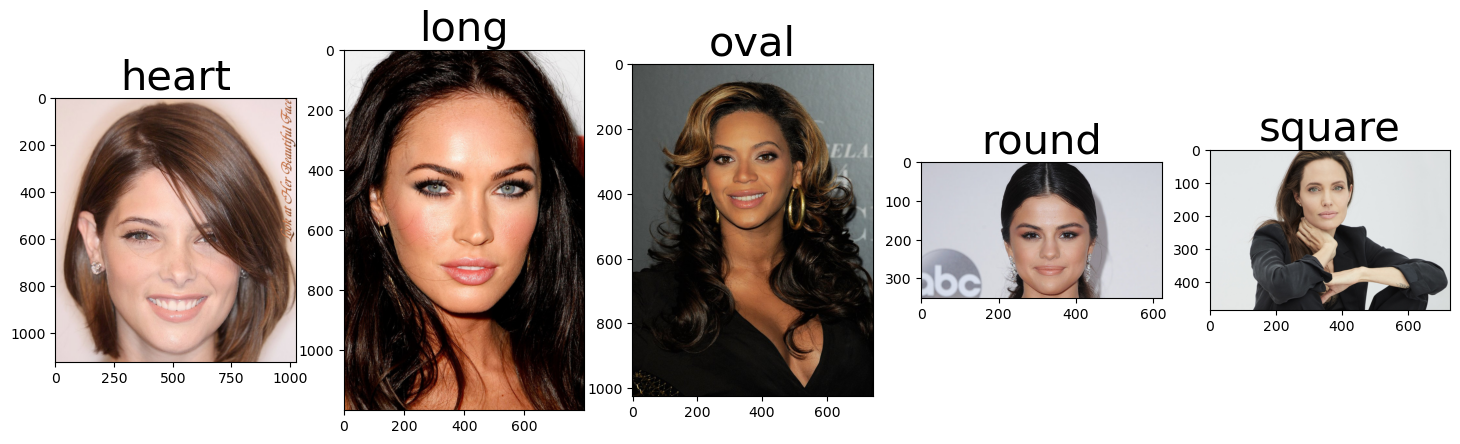

In [2]:
plt.figure(figsize=(18, 18))  # Create a figure with a size of 18x18 inches

examples = ['data/pics/heart/Ashley Greene (1).jpg',
            'data/pics/long/Megan Fox (1).jpg',
            'data/pics/oval/Beyonce (1).jpg',
            'data/pics/round/Selena Gomez (1).jpg',
            'data/pics/square/angelina jolie 1.jpg']  # List of image file paths

names = ['heart', 'long', 'oval', 'round', 'square']  # List of shape names

for i in range(0, len(examples)):
    plt.subplot(2, 5, i + 1)  # Create a 2x5 subplot and select the current position
    img = Image.open(examples[i])  # Open the image file
    draw = ImageDraw.Draw(img)  # Create a drawing object for the image
    plt.imshow(img)  # Display the image
    plt.title(names[i], fontsize=30)  # Set the title of the subplot
    img.close()  # Close the image file

Seperti yang bisa Anda lihat, bentuk wajah memiliki struktur yang berbeda-beda:

1. Wajah berbentuk hati dicirikan oleh tulang pipi yang lebih lebar yang menyempit ke dagu yang kecil.
2. Wajah panjang, memanjang dan sangat sempit.
3. Wajah oval mirip dengan wajah panjang tetapi lebih penuh.
4. Wajah bulat memiliki bentuk yang berbeda, jauh lebih pendek dan lebih lebar.
5. Wajah berbentuk persegi ditandai dengan garis rahang yang kuat.

# Dataset Collection

Untuk datasetnya sendiri, awalnya kami akan menggunakan sample wajah pria yang sudah ditemukan dari kaggle tetapi karena dataset yang kami temukan tidak sesuai dengan requiremetn yang kami inginkan. Maka dari itu kami menggunakan dan memodifikasi dataset gambar yang digunakan pada repository sebelumnya dari projek hussein073

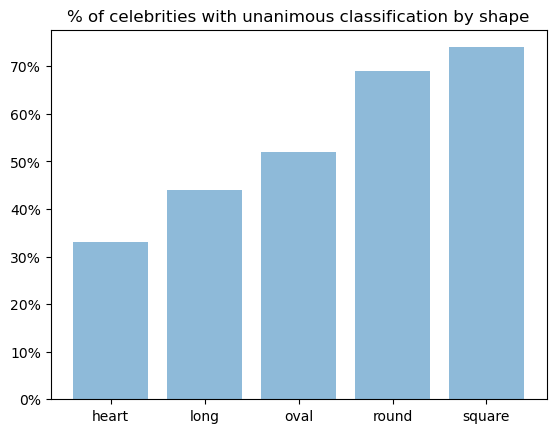

In [3]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots()  # Create a new figure and axis
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))  # Create a custom formatter for the y-axis
ax.yaxis.set_major_formatter(formatter)  # Set the formatter for the y-axis

percent_unanim = [33, 44, 52, 69, 74]  # Percentage of celebrities with unanimous classification by shape
shapes = ['heart', 'long', 'oval', 'round', 'square']  # List of shape names
y_pos = np.arange(len(shapes))  # Create an array of y-positions for the bars

plt.bar(y_pos, percent_unanim, align='center', alpha=0.5)  # Create a bar chart
plt.xticks(y_pos, shapes)  # Set the x-axis labels to the shape names
plt.title('% of celebrities with unanimous classification by shape')  # Set the title of the chart
plt.show()  # Display the chart

Wajah persegi memiliki konsensus paling banyak, memungkinkan untuk menggunakan sebagian besar selebriti dengan wajah persegi.

Gambar-gambar yang digunakan untuk proyek ini tersedia di folder DATA di repository hussein073. Datasetnya terdiri dari sekitar 1500 gambar untuk 74 selebriti.

Dua diagram lingkaran di bawah ini menunjukkan persentase gambar berdasarkan bentuk wajah dan persentase selebriti dengan setiap bentuk wajah dalam dataset. Dapat dilihat bahwa bentuk wajah direpresentasikan dengan cara yang sama di dalam dataset.

In [4]:
data = pd.read_csv('all_features.csv')

In [5]:
data

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,0,1,2,...,Width,Height,H_W_Ratio,Jaw_width,J_F_Ratio,MJ_width,MJ_J_width,filenum,filename,classified_shape
0,0,0,0,0,0,0,0,75.0,98.0,75.0,...,150.003333,212.084889,1.413868,69.065187,0.460424,122.036880,1.766981,0,Ciara (9).jpg,heart
1,1,1,1,1,1,1,1,75.0,98.0,76.0,...,151.003311,210.038092,1.390950,79.000000,0.523167,125.000000,1.582278,1,Ciara (11).jpg,heart
2,2,2,2,2,2,2,2,76.0,106.0,78.0,...,152.029602,218.036694,1.434173,70.007142,0.460484,124.004032,1.771305,2,Brittany Snow (7).jpg,heart
3,3,3,3,3,3,3,3,71.0,99.0,74.0,...,157.012738,220.009091,1.401218,68.007353,0.433133,124.004032,1.823392,3,Julianne Hough (19).jpg,heart
4,4,4,4,4,4,4,4,80.0,99.0,83.0,...,148.030402,214.233517,1.447226,70.007142,0.472924,121.000000,1.728395,4,Ashley Greene (24).jpg,heart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,1519,1519,1519,1519,1519,1519,1519,69.0,95.0,72.0,...,162.003086,206.087360,1.272120,71.000000,0.438263,129.003876,1.816956,1519,Ginnifer Goodwin (3).jpg,round
1520,1520,1520,1520,1520,1520,1520,1520,79.0,96.0,80.0,...,148.054044,188.170136,1.270956,65.192024,0.440326,116.068945,1.780416,1520,Cristina Ricci (6).jpg,round
1521,1521,1521,1521,1521,1521,1521,1521,71.0,93.0,72.0,...,151.052971,208.000000,1.377000,73.000000,0.483274,130.000000,1.780822,1521,Chrissy Tiegen (10).jpg,round
1522,1522,1522,1522,1522,1522,1522,1522,78.0,106.0,77.0,...,147.030609,218.009174,1.482747,76.006579,0.516944,128.000000,1.684065,1522,mila kunis 3.jpg,round


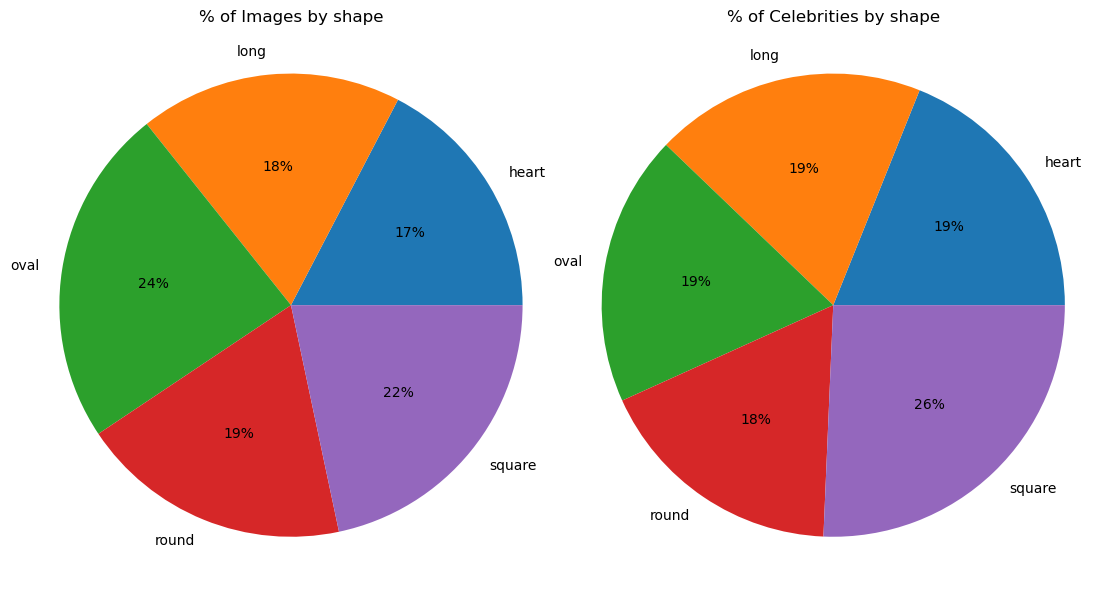

In [6]:
plt.figure(figsize=(11, 6))  # Create a figure with a size of 11x6 inches
plt.subplot(1, 2, 1)  # Create a 1x2 subplot and select the first position

shape_count = data.groupby('classified_shape').count()['0']  # Count the number of images for each shape
labels = shape_count.index  # Get the shape names from the index
patches = plt.pie(shape_count, autopct='%1.f%%', labels=labels)  # Create a pie chart with the shape counts
plt.axis('equal')  # Set the aspect ratio to be equal
plt.title('% of Images by shape')  # Set the title of the chart
plt.tight_layout()  # Adjust the spacing of the plot

plt.subplot(1, 2, 2)  # Select the second position of the subplot
celebritites_by_shape = [14, 14, 14, 13, 19]  # Number of celebrities for each shape
labels = ['heart', 'long', 'oval', 'round', 'square']  # Shape names
patches = plt.pie(celebritites_by_shape, autopct='%1.f%%', labels=labels)  # Create a pie chart with the celebrity counts
plt.axis('equal')  # Set the aspect ratio to be equal
plt.title('% of Celebrities by shape')  # Set the title of the chart
plt.tight_layout()  # Adjust the spacing of the plot
plt.show()  # Display the chart

# Processing Images

### Feature Extraction

Di bawah ini adalah peta dari peta fitur wajah, yang menghasilkan 68 titik dalam penggambaran peta fiturnya

<img src="face_points.jpg" alt="face_points" style="width: 600px;"/>

Sayangnya library face_recognition tidak menyediakan titik puncak kepala, jadi berdasarkan beberapa pengamatan, akan tetapi bisa dilihat bahwa titik tengah wajah itu adalah titik 29.

### Processing

Untuk memproses lebih dari 1500 gambar, digunakan suatu fungsi yang menelusuri folder yang dibuat sewaktu tahap pengumpulan data. Fungsi ini menggunakan nama folder untuk menyimpan klasifikasi.

Semua titik dan fitur ini kemudian ditempatkan ke dalam kerangka data untuk dianalisis dengan berbagai model.

In [7]:
df = pd.DataFrame(columns = ['0','1','2','3','4','5','6','7','8','9','10','11',	'12',	'13',	'14',	'15',	'16','17',
                             '18',	'19',	'20',	'21',	'22',	'23',	'24','25',	'26',	'27',	'28',	'29',
                             '30',	'31',	'32',	'33',	'34',	'35',	'36',	'37',	'38',	'39',	'40',	'41',
                             '42',	'43',	'44',	'45',	'46',	'47',	'48',	'49',	'50',	'51',	'52',	'53',
                             '54',	'55',	'56',	'57',	'58',	'59',	'60',	'61',	'62',	'63',	'64',	'65',
                             '66',	'67',	'68',	'69',	'70',	'71',	'72',	'73',	'74',	'75',	'76',	'77',
                             '78',	'79',	'80',	'81',	'82',	'83',	'84',	'85',	'86',	'87',	'88',	'89',
                             '90',	'91',	'92',	'93',	'94',	'95',	'96',	'97',	'98',	'99',	'100',	'101',
                             '102',	'103',	'104',	'105',	'106',	'107',	'108',	'109',	'110',	'111',	'112',	'113',
                             '114',	'115',	'116',	'117',	'118',	'119',	'120',	'121',	'122',	'123',	'124',	'125',
                             '126',	'127',	'128',	'129',	'130',	'131',	'132',	'133',	'134',	'135',	'136',	'137',
                             '138',	'139',	'140',	'141',	'142',	'143','A1','A2','A3','A4','A5','A6','A7','A8','A9',
                            'A10','A11','A12','A13','A14','A15','A16','Width','Height','H_W_Ratio','Jaw_width','J_F_Ratio',
                             'MJ_width','MJ_J_width'])

In [8]:
%run -i functions_only.py    # This calls my main functions (make_face_df, Distance, ScaleRotateTranslate)

<Figure size 640x480 with 0 Axes>

In [9]:
%run -i functions_only_save.py    # This calls my 2nd function for Recommendation Purpose

In [10]:
# Add all the faces features with shape to a DATA CSV file for model purpose.
data.to_csv('all_features.csv')  # Save the DataFrame to a CSV file named 'all_features.csv'

In [11]:
# You can use this only if the data is already in a DF so you don't have to keep running it over and over:

In [12]:
# load data file
# start here
data = pd.read_csv('all_features.csv', index_col=None)  # Load the 'all_features.csv' file into the DataFrame 'data'
data = data.drop('Unnamed: 0', axis=1)  # Drop the 'Unnamed: 0' column from the DataFrame
data.shape  # Print the shape of the DataFrame

(1524, 177)

# Data Visualizations

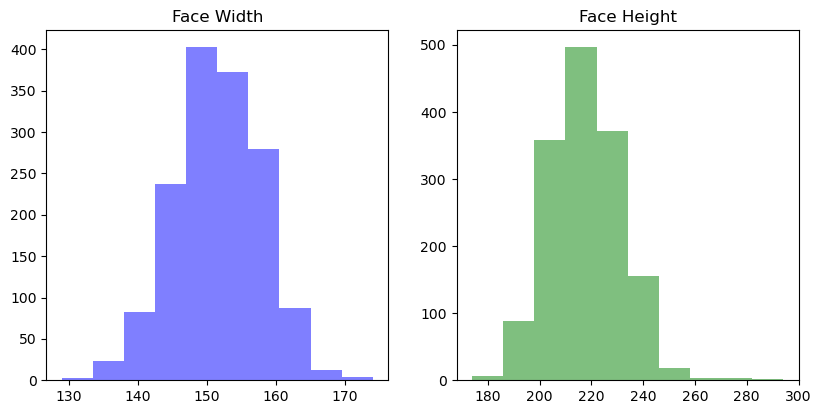

In [13]:
xclean = data.dropna(axis=0, how='any')  # Create a new DataFrame 'xclean' by dropping any rows with missing values

plt.figure(figsize=(15, 10))  # Create a figure with a size of 15x10 inches
plt.subplot(2, 3, 1)  # Create a 2x3 subplot and select the first position
plt.hist(xclean['Width'], 10, facecolor='blue', alpha=0.5)  # Create a histogram of the 'Width' column
plt.title('Face Width')  # Set the title of the subplot

plt.subplot(2, 3, 2)  # Select the second position of the subplot
plt.hist(xclean['Height'], 10, facecolor='green', alpha=0.5)  # Create a histogram of the 'Height' column
plt.title('Face Height')  # Set the title of the subplot

# Repeat the process for other features (H_W_Ratio, Jaw_width, MJ_width, A16)
plt.show()  # Display the figure

Atribut di sini tampak terdistribusi secara normal.

In [14]:
from scipy import stats  # Import the stats module from scipy

S1 = []  # List to store the first shape in each pair
S2 = []  # List to store the second shape in each pair
S1S2 = []  # List to store the combination of the two shapes
p_value = []  # List to store the p-values from the t-tests
t_tests = pd.DataFrame()  # Create an empty DataFrame to store the t-test results

labels = ['heart', 'long', 'oval', 'round', 'square']  # List of shape labels

# Perform two-sample t-tests for all pairs of shapes
for i in range(0, 4):
    for j in range(0, 4):
        # Perform the t-test between the widths of the ith and (j+1)th shape
        t = (stats.ttest_ind(xclean[xclean.classified_shape == labels[i]].Width,
                            xclean[xclean.classified_shape == labels[j+1]].Width))
        p_value.append(t.pvalue)  # Store the p-value from the t-test
        S1.append(labels[i])  # Store the first shape
        S2.append(labels[j+1])  # Store the second shape

# Store the t-test results in the DataFrame
t_tests['S1'] = S1
t_tests['S2'] = S2
t_tests["test"] = t_tests["S1"].map(str) + ':' + t_tests["S2"]
t_tests['p_value'] = p_value
t_tests = t_tests[t_tests.S1 != t_tests.S2]  # Remove rows where the shapes are the same

In [15]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'green' if val < 0.05 else 'black'
    return 'color: %s' % color

# Apply the custom formatting function to the 'p_value' column
s = t_tests.style.applymap(color_negative_red, subset=pd.IndexSlice[:, ['p_value']])
s  # Display the formatted DataFrame

,S1,S2,test,p_value
0,heart,long,heart:long,0.000710
1,heart,oval,heart:oval,0.318952
2,heart,round,heart:round,0.000001
3,heart,square,heart:square,0.316319
5,long,oval,long:oval,0.000009
6,long,round,long:round,0.000000
7,long,square,long:square,0.017976
8,oval,long,oval:long,0.000009
10,oval,round,oval:round,0.000039
11,oval,square,oval:square,0.039463


Berdasarkan t-test p-values, kita mengklasifikasikan berdasarkan hipotesa null untuk pasangan dengan huruf hijau (menggunakan p < 0,05):

1. Wajah berbentuk hati & panjang
2. Wajah Hati & Bulat
3. Wajah panjang & Oval
4. Wajah Panjang & Bulat
5. Wajah Panjang & Persegi
6. Wajah Oval & Bulat
7. Wajah Oval & Persegi
8. Wajah Bulat & Persegi


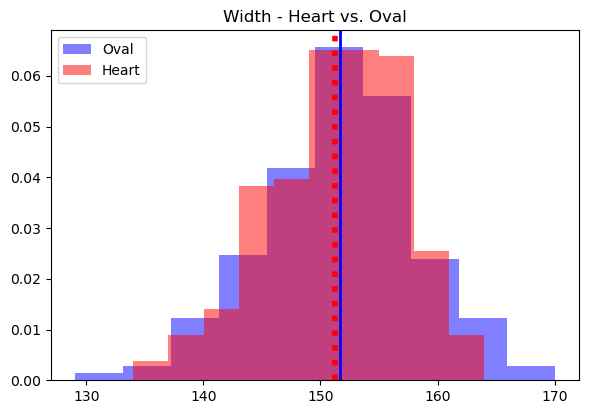

In [16]:
# Face width histograms; purposely normed because of varying sample sizes.
HW = xclean[xclean['classified_shape'] == "heart"]
OW = xclean[xclean['classified_shape'] == "oval"]
LW = xclean[xclean['classified_shape'] == "long"]
RW = xclean[xclean['classified_shape'] == "round"]

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.hist(OW['Width'], label='Oval', alpha=0.5, color='b', density=True)
plt.hist(HW['Width'], label='Heart', alpha=0.5, color='r', density=True)
plt.axvline(OW['Width'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(HW['Width'].mean(), color='r', linestyle='dotted', linewidth=4)
plt.title('Width - Heart vs. Oval')
plt.legend(loc='upper left')

# Repeat the process for other shape comparisons (Long vs. Round)
plt.show()

In the first graph where the p >= 0.05, you can see how close the means are for oval- and heart-shaped faces' width and their distributions overlap significantly. On the right hand, the width for long and round faces are signficantly different and the mean for round is much higher and the entire distribution is shifted towards wider face dimensions.

Pada grafik pertama di mana p >= 0,05, Anda dapat melihat seberapa dekat rata-rata untuk lebar wajah berbentuk oval dan heart, dan distribusinya saling menindih secara signifikan. Lebar untuk wajah panjang dan bulat berbeda secara signifikan, dan rata-rata untuk wajah round jauh lebih tinggi, dengan seluruh distribusi bergeser ke arah dimensi wajah yang lebih lebar.

### Box Plots

Berikut merupakan visualisasi menggunakan box plot untuk dengan meninjau distribusi, rata-rata, dan median untuk fitur-fitur utama dari kumpulan data.

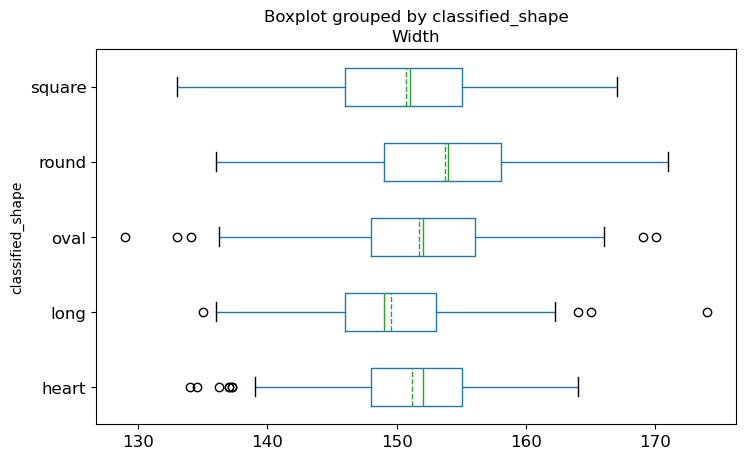

In [17]:
data.boxplot(column='Width', by='classified_shape', vert=False, ax=None, fontsize=12, rot=0, grid=False, figsize=(8, 5),
             meanline=True, showmeans=True,
             layout=None, return_type=None)
plt.show()

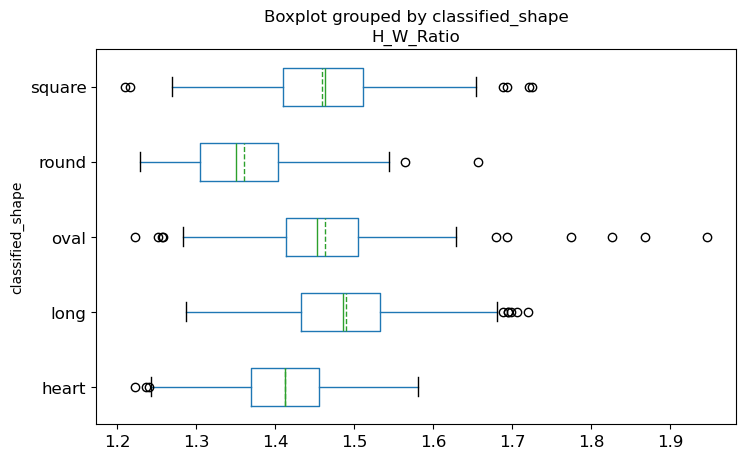

In [18]:
data.boxplot(column='H_W_Ratio', by='classified_shape', vert=False, ax=None, fontsize=12, rot=0, grid=False, figsize=(8, 5),
             layout=None, return_type=None, meanline=True, showmeans=True)
plt.show()

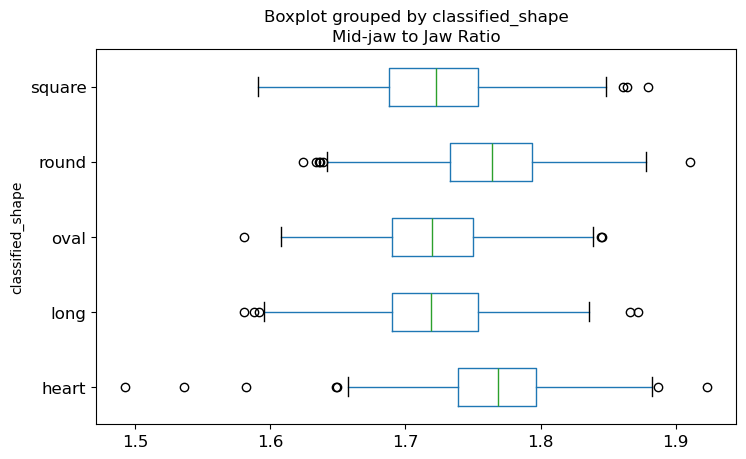

In [19]:
data.boxplot(column='MJ_J_width', by='classified_shape',vert=False, ax=None, fontsize=12, rot=0, grid=False, figsize=(8,5), 
                  layout=None, return_type=None)
plt.title('Mid-jaw to Jaw Ratio')
plt.show()

Rasio ini memungkinkan kita untuk mengamati penyempitan antara rahang tengah dan rahang untuk wajah berbentuk heart, yang dibuktikan oleh rasio yang lebih tinggi.  Sekali lagi, Anda dapat melihat bahwa bentuk hati dan oval berbeda.  Wajah berbentuk hati ditandai dengan dagu yang sempit yang berarti rasio rahang tengah terhadap rahang lebih tinggi (yaitu, rahang tengah lebih besar secara proporsional dibandingkan dengan area rahang bawah/dagu). 

In [20]:
!pip install opencv-python

The following images illustrate how the crop/align/rotate process allows for the faces to be very consistent in their position within the frame. As observed, the photos were taken by all different photographers, at different times and from multiple positions.  Without this step to standardize, there was a lot more noise in the derived and calculated  features.  The first 5 images are all of the pictures of the same celebrity and 6th image is all of the square-shaped face celebrities.  

In [21]:
%run -i plot_images.py

OSError: cannot open resource

<Figure size 2000x1000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# Evaluate models

## Modeling Pipeline

Model dibangun dengan mengambil data seperti yang dijelaskan di atas, kemudian diskalakan data dengan menghilangkan rata-rata dan menskalakan ke unit varians.  Hal ini dilakukan agar setiap fitur berkontribusi secara proporsional terhadap model. kemudian kita mencoba mengekstrak fitur menggunakan PCA, namun proses tersebut tidak secara signifikan meningkatkan kecepatan dan/atau hasil model saya. Meskipun PCA dapat sedikit memperbaiki overfitting.

Input berskala dibagi menjadi train/test dan kemudian diproses melalui model-model di bawah ini.

### Why KKN dan Neural Network?

Kami memilih KNN karena salah satu fiturnya yang paling menarik adalah mudah dimengerti dan mudah diimplementasikan, terutama untuk masalah multiclassifikasi. Setelah beberapa kali dijalankan, KNN cenderung memberikan performa yang sesuai untuk model yang digunakan.

## Supervised Learning - the chosen model

### Set up Test/Train for supervised learning

In [22]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import ensemble
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA 

In [23]:
data_clean = data.dropna(axis=0, how='any')
X = data_clean
X = X.drop(['filenum','filename','classified_shape'] , axis = 1)
X_norm = normalize(X)
Y = data_clean['classified_shape']

### Standardize features by removing the mean and scaling to unit variance

In [24]:
scaler = StandardScaler()  
scaler.fit(X)  

X = scaler.transform(X)

### Split into train/test sets

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y,
    test_size=0.25,
    random_state=1200)

### Apply PCA for dimension reduction

In [26]:
n_components = 18
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [27]:
# #Remove PCA 
X_train_pca = X_train
X_test_pca = X_test

## Neural Network (MLP)

In [28]:
from sklearn.neural_network import MLPClassifier

In [33]:
import itertools

mlp = MLPClassifier(hidden_layer_sizes=(60,10,60,30), solver='sgd',shuffle  = True, 
                    learning_rate_init=0.01, max_iter = 200,warm_start  = False)

from sklearn.model_selection import RandomizedSearchCV 
param_grid = { 
    'learning_rate_init':[0.01]   # always the best
    ,'hidden_layer_sizes': [x for x in itertools.product((10,20,30,40,50,60,100),repeat=4)]
    ,'max_iter': [100] # always the best
    ,'random_state': [525]
}

random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid, cv=5, n_iter=50)
random_search.fit(X_train_pca, Y_train)
print(random_search.best_estimator_)

MLPClassifier(hidden_layer_sizes=(10, 60, 60, 30), learning_rate_init=0.01,
              max_iter=100, random_state=525, solver='sgd')


In [30]:
# With best model tuning

best_mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 100, 30, 100), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=525,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
best_mlp.fit(X_train_pca, Y_train)

MLPClassifier(hidden_layer_sizes=(60, 100, 30, 100), learning_rate_init=0.01,
              max_iter=100, random_state=525, solver='sgd')

In [31]:
print(best_mlp.score(X_train_pca, Y_train))
mlp_score = best_mlp.score(X_test_pca,Y_test)
print(mlp_score)

1.0
0.901595744680851


In [32]:
y_pred = best_mlp.predict(X_test_pca)
 
mlp_crosstab = pd.crosstab(Y_test, y_pred, margins=True)
mlp_crosstab

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       heart       0.97      0.93      0.95        75
        long       0.87      0.91      0.89        68
        oval       0.85      0.94      0.89        99
       round       0.96      0.89      0.92        62
      square       0.89      0.82      0.86        72

    accuracy                           0.90       376
   macro avg       0.91      0.90      0.90       376
weighted avg       0.90      0.90      0.90       376

